# CAPAG

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importacao CAPAG dez/2020
c2020 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAG-Municipios-Dez2020.csv', sep = ';')
c2020 = c2020[['Cod.IBGE', 'UF', 'Classificação da CAPAG']]
c2020 = c2020[c2020['Classificação da CAPAG'] != 'n.d.']
c2020 = c2020.rename(columns = ({'Cod.IBGE' : 'cod',
                                'Classificação da CAPAG' : 'capag'}))
c2020['data'] = '01-12-2020'

In [3]:
# importacao CAPAG abr/2021
c2021 = pd.read_excel('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAGMunicipios-Abr2021.xlsx', engine = 'openpyxl' )
c2021 = c2021[['Cod.IBGE', 'CAPAG_Oficial']]
c2021 = c2021[c2021['CAPAG_Oficial'] != 'n.d.']

c2021 = c2021.rename(columns = ({'Cod.IBGE' : 'cod',
                                'CAPAG_Oficial' : 'capag'}))

c2021['data'] = '01-04-2021'

In [4]:
# merge nos dois dataframes
capag = c2020.merge(c2021, how = 'inner', on = 'cod')

# renomeando as colunas
cols = ['cod_ibge', 'uf', 'capag_2020', 'data_2020', 'capag_2021', 'data_2021']
capag.columns = cols

In [5]:
# resultado final
capag.head()

,cod_ibge,uf,capag_2020,data_2020,capag_2021,data_2021
0,5200050,GO,B,01-12-2020,A,01-04-2021
1,3100104,MG,B,01-12-2020,A,01-04-2021
2,5200100,GO,C,01-12-2020,C,01-04-2021
3,3100203,MG,B,01-12-2020,A,01-04-2021
4,1500107,PA,C,01-12-2020,C,01-04-2021


In [6]:
capag.shape

(3668, 6)

In [7]:
3668 / 5570

0.6585278276481149

# DATA ANALYSIS

In [49]:
def plotar_grafico():
    sns.set_style("whitegrid")
    
    df1 = pd.DataFrame(capag['capag_2020'].value_counts()).reset_index()
    df2 = pd.DataFrame(capag['capag_2021'].value_counts()).reset_index()
    
    plt.figure(figsize = (18, 5))
    plt.subplot(1, 2, 1)
    ax = sns.barplot(data = df1, x = 'index', y = 'capag_2020', color = 'steelblue');
    plt.title('CAPAG 2020 - Quantidade de Municípios por Nota', fontsize = 12, weight = 'semibold', pad = 20);
    plt.ylabel('Quantidade');
    plt.xlabel('Nota');
    
    plt.bar_label(ax.containers[0], label_type='center', color = 'white', fontsize = 13,  fmt='%.0f');

    plt.subplot(1, 2, 2)
    ax2 = sns.barplot(data = df2, x = 'index', y = 'capag_2021', color = 'steelblue');
    plt.title('CAPAG 2021 - Quantidade de Municípios por Nota', fontsize = 12, weight = 'semibold', pad = 20);
    plt.ylabel('Quantidade');
    plt.xlabel('Nota');
    
    plt.bar_label(ax2.containers[0], label_type='center', color = 'white', fontsize = 13,  fmt='%.0f');


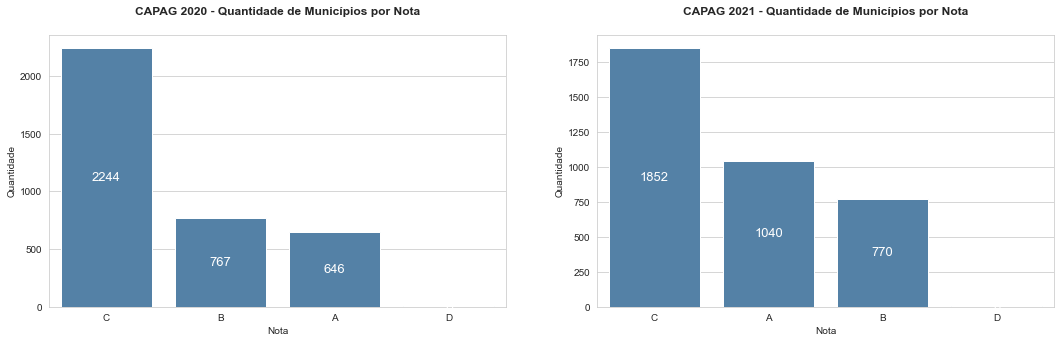

In [50]:
plotar_grafico()

In [56]:
pd.DataFrame(capag['capag_2020'].value_counts(normalize = True) * 100)

,capag_2020
C,61.177754
B,20.910578
A,17.611778
D,0.299891


In [57]:
pd.DataFrame(capag['capag_2021'].value_counts(normalize = True) * 100)

,capag_2021
C,50.490731
A,28.353326
B,20.992366
D,0.163577


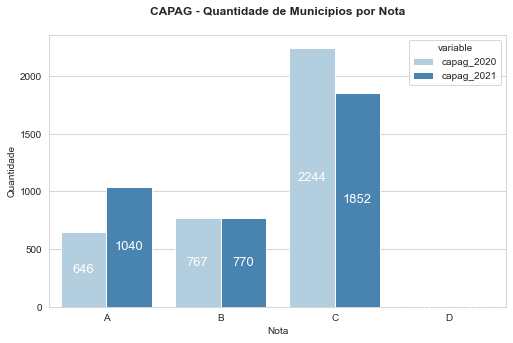

In [79]:
def plotar_grafico():
    sns.set_style("whitegrid")
    
    aux = capag[['cod_ibge', 'capag_2020', 'capag_2021']]
    aux = pd.melt(aux, id_vars = 'cod_ibge')
    aux = aux.groupby(['variable', 'value'], as_index = False).count()
    
    plt.figure(figsize = (18, 5))
    plt.subplot(1, 2, 1)
    ax = sns.barplot(data = aux, x = 'value', y = 'cod_ibge',hue = 'variable', palette = 'Blues');
    plt.title('CAPAG - Quantidade de Municípios por Nota', fontsize = 12, weight = 'semibold', pad = 20);
    plt.bar_label(ax.containers[0], label_type='center', color = 'white', fontsize = 13,  fmt='%.0f');
    plt.bar_label(ax.containers[1], label_type='center', color = 'white', fontsize = 13,  fmt='%.0f');
    plt.ylabel('Quantidade');
    plt.xlabel('Nota');

plotar_grafico()